# Лабораторна робота 1

## Вихідні дані: <br>
### Амплітуда імпульсу: A = 1 <br>
### Період сигналу: T = 1 c <br>
### Тривалість імпульсу: t1 = 0.5 c <br>
### Кругова частота: $\omega_0 = \frac{2\pi}{T} = 2\pi$ <br>
## Тригонометричний ряд Фур'є Загальна формула ряду: <br>
### $f(t) = \frac{a_0}{2} + \sum_{k=1}^{\infty} (a_k \cos(k\omega_0 t) + b_k \sin(k\omega_0 t))$
## 1. Постійна складова ($a_0$): Для меандру площа позитивної та негативної частин за період однакова, тому середнє значення дорівнює нулю $a_0=0$ <br>
## 2.Коефіцієнти $a_k$ : Функція непарна відносно середини фронту, тому косинусні складові відсутні: $a_k=0$ <br>
## 3.Коефіцієнти $b_k$ : Визначаються за формулою для непарної функції: <br>
### $b_k = \frac{4}{T} \int_{0}^{T/2} A \sin(k\omega_0 t) dt = \frac{4A}{\pi k} \quad (\text{для непарних } k)$ <br>
### $b_k = 0 \quad (\text{для парних } k)$ <br>
## Розрахунок перших гармонік (при A=1): <br>
### $k=1: \quad b_1 = \frac{4 \cdot 1}{\pi \cdot 1} \approx 1.273$ <br>
### $k=3: \quad b_3 = \frac{4 \cdot 1}{\pi \cdot 3} \approx 0.424$ <br>
### $k=5: \quad b_5 = \frac{4 \cdot 1}{\pi \cdot 5} \approx 0.255$ <br>
## Амплітудний спектр ($A_k$): Так як $a_k=0$ , амплітуда дорівнює модулю : <br> 
### $ A_k = \sqrt{a_k^2 + b_k^2} = |b_k| = \frac{4}{\pi k} $ <br>
## Фазовий спектр ($\phi_k$): <br>
### $\phi_k = \text{arctg}\left( -\frac{b_k}{a_k} \right) = -\frac{\pi}{2} \quad (-90^\circ)$ <br>
## Базис Волша Сигнал $f(t)$ за формою повністю збігається з першою функцією Волша $\text{wal}(1, t)$ . Тому спектр у базисі Волша містить лише один коефіцієнт: $ C_1 = 1.0$  <br>
### Всі інші коєфіцієнти $C_k = 0 (при k > 1) $ 

# Блок налаштувань

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

A = 1
T = 1
N = 9  
fs = 1000  

t = np.linspace(0, T, fs, endpoint=False)

original_signal = A * square(2 * np.pi * t / T)

# 1

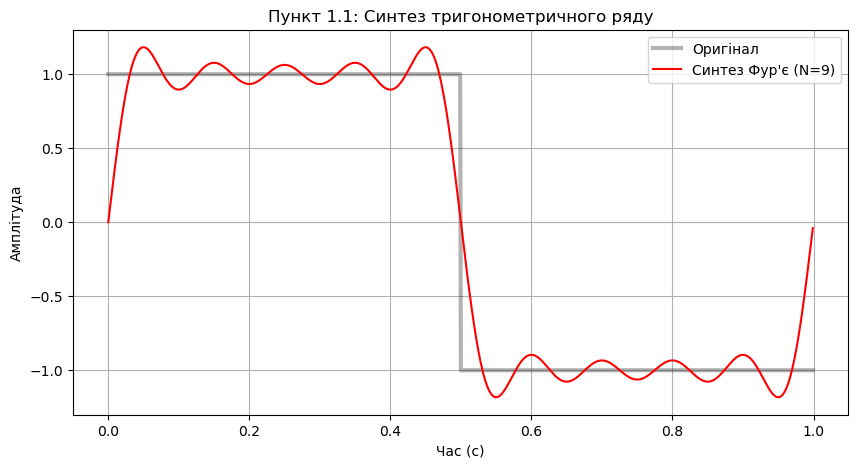

In [7]:
fourier_signal = np.zeros_like(t)

for k in range(1, N + 1, 2):  
    bk = (4 * A) / (np.pi * k)
    fourier_signal += bk * np.sin(2 * np.pi * k * t / T)

plt.figure(figsize=(10, 5))
plt.plot(t, original_signal, 'k', linewidth=3, alpha=0.3, label='Оригінал')
plt.plot(t, fourier_signal, 'r', label=f"Синтез Фур'є (N={N})")
plt.title("Пункт 1.1: Синтез тригонометричного ряду")
plt.xlabel("Час (с)")
plt.ylabel("Амплітуда")
plt.legend()
plt.grid(True)
plt.show()

# 2

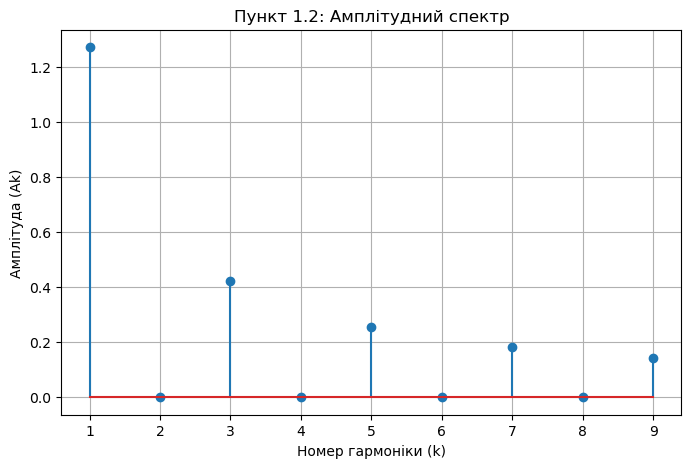

In [8]:
k_indices = range(1, N + 1)
amplitudes = []

for k in k_indices:
    if k % 2 != 0: 
        val = (4 * A) / (np.pi * k)
        amplitudes.append(val)
    else: # Парні
        amplitudes.append(0)

plt.figure(figsize=(8, 5))
plt.stem(k_indices, amplitudes)
plt.title("Пункт 1.2: Амплітудний спектр")
plt.xlabel("Номер гармоніки (k)")
plt.ylabel("Амплітуда (Ak)")
plt.xticks(k_indices) 
plt.grid(True)
plt.show()

# 3

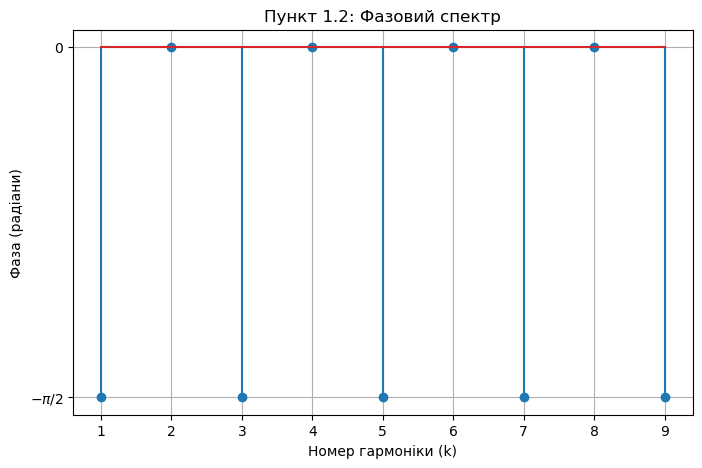

In [9]:
phases = []
for k in range(1, N + 1):
    if k % 2 != 0:
        phases.append(-np.pi/2) 
    else:
        phases.append(0)

plt.figure(figsize=(8, 5))
plt.stem(range(1, N + 1), phases)
plt.title("Пункт 1.2: Фазовий спектр")
plt.xlabel("Номер гармоніки (k)")
plt.ylabel("Фаза (радіани)")
plt.yticks([-np.pi/2, 0], [r'$-\pi/2$', '0'])
plt.grid(True)
plt.show()

# 4

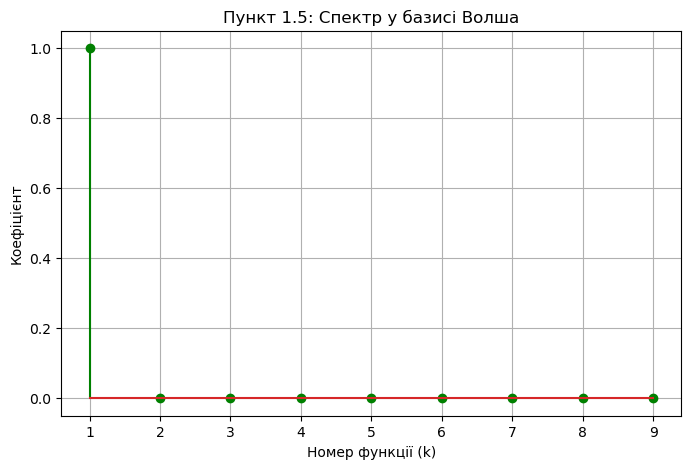

In [10]:
walsh_indices = np.arange(1, N + 1)
walsh_amps = np.zeros(N)
walsh_amps[0] = A  

plt.figure(figsize=(8, 5))
plt.stem(walsh_indices, walsh_amps, linefmt='g-', markerfmt='go')
plt.title("Пункт 1.5: Спектр у базисі Волша")
plt.xlabel("Номер функції (k)")
plt.ylabel("Коефіцієнт")
plt.grid(True)
plt.show()

# 5

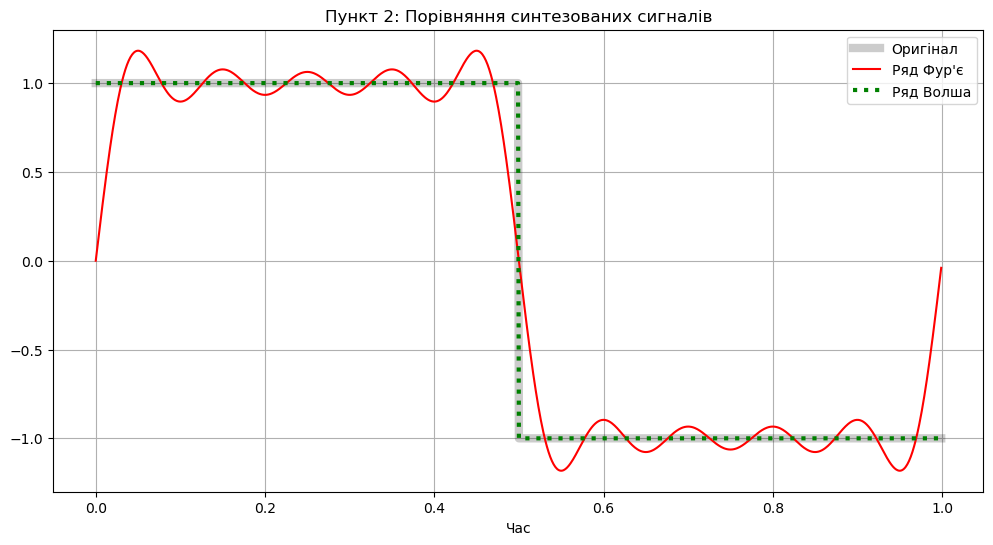

In [11]:
fourier_sig = np.zeros_like(t)
for k in range(1, N + 1, 2):
    fourier_sig += ((4 * A) / (np.pi * k)) * np.sin(2 * np.pi * k * t / T)

walsh_sig = original_signal.copy()

plt.figure(figsize=(12, 6))
plt.plot(t, original_signal, 'k', linewidth=6, alpha=0.2, label='Оригінал')
plt.plot(t, fourier_sig, 'r', linewidth=1.5, label="Ряд Фур'є")
plt.plot(t, walsh_sig, 'g:', linewidth=3, label="Ряд Волша")

plt.title("Пункт 2: Порівняння синтезованих сигналів")
plt.xlabel("Час")
plt.legend()
plt.grid(True)
plt.show()

# 6

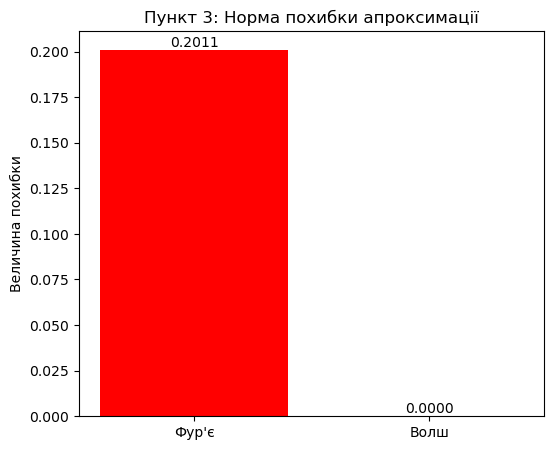

In [12]:
err_fourier = np.sqrt(np.mean((original_signal - fourier_signal)**2))
err_walsh = 0.0 

plt.figure(figsize=(6, 5))
methods = ['Фур\'є', 'Волш']
errors = [err_fourier, err_walsh]

bars = plt.bar(methods, errors, color=['red', 'green'])
plt.title("Пункт 3: Норма похибки апроксимації")
plt.ylabel("Величина похибки")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()